# K Nearest Neighbors

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alinaali/Data_Science_and_Machine_Learning/blob/main/Supervised%20Learning/k_Nearest%20Neighbors/K_Nearest_Neighbors.ipynb)


The KNN algorithm is predominantly used as a classifier. Let's take a look at how KNN works to classify unseen input data points.

Unlike classification using artificial neural networks, k-nearest neighbors classification is easy to understand and simple to implement. It's ideal in situations where the data points are well defined or non-linear.

In essence, KNN performs a voting mechanism to determine the class of an unseen observation. This means that the class with the majority vote will become the class of the data point in question.

If the value of K is equal to one, then we'll use only the nearest neighbor to determine the class of a data point. If the value of K is equal to ten, then we'll use the ten nearest neighbors, and so on.

 It's considered a non-parametric method because it doesn’t make any assumptions about the underlying data distribution. Simply put, KNN tries to determine what group a data point belongs to by looking at the data points around it.


 ---

<p align="center">
    <img src="knn1.png" width="700" hight ="800">
</p>

---


## Steps to build a KNN Algorithm

1. Importing the dataset
2. Data pre-processing
3. Algorithm Training
4. Predicting & Visualization

## Data 
The Penguins dataset is used to implement and train this algorithm 


## Libraries/Packages: 
The first step is to import libraries. 

- Import Numpy
- Import Pandas
- Import Matplotlib
- Import Seaborn
- Import Plot Decision Regions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()


## Importing Dataset

Penguins dataset is being used in this KNN algorithm

In [2]:
# Import the data
penguins = sns.load_dataset("penguins")

In [4]:
#I am dropping all the rows that contain NaN values in this Penguins dataset.
penguins = penguins.dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [5]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


## Data pre-processing

There are total 334 rows and 7 columns.
The columns includes species, island, bill length, bill depth, flipper length, body mass, and sex.

The dataset consists of 7 columns.

- species: penguin species (Adelie, Gentoo, and Chinstrap)
- bill_length_mm: bill length (mm)
- bill_depth_mm: bill depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- island: island name (Dream, Torgersen, or Biscoe)
- sex: penguin sex


Here in the given cell, will plot the all three species. The x-axis is bill length and y-axis is bill depth.

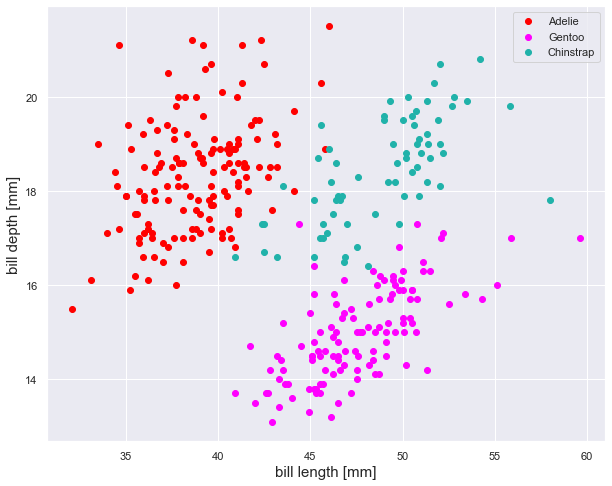

In [16]:
# Plot the data
penguins_species = ["Adelie", "Gentoo", "Chinstrap"]
colors = ["red", "magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(penguins_species, colors):
    temp_df = penguins[penguins.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("bill length [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm]", fontsize = 15)
ax.legend()
plt.show()

# Train/Test Split Data

Here I am splitting the data in X train, X test, y train, y test.

In [17]:
from sklearn.model_selection import train_test_split

X = penguins[["bill_length_mm",
          "bill_depth_mm"]].to_numpy()

y = penguins["species"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

# Calculate the Euclidean Distance

---

For our distance measure, we will choose the **Euclidean distance** defined by the following equation:

$$
d(p, q) = \sqrt{(p - q)^{T} (p - q)}
$$


---

In [18]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between point 10 and 67 is {distance(X[10], X[67])}")

The distance between point 10 and 67 is 9.265527507918797


With distance function, now its time to write a function to compute the $k$-nearest neighbors to a given point. 

In [19]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

# Test the k_nearest_neighbors function

In [20]:
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([50.9, 17.9]), 'Chinstrap', 0.4999999999999993],
 [array([51.5, 18.7]), 'Chinstrap', 0.5385164807134515],
 [array([50.8, 18.5]), 'Chinstrap', 0.5830951894845304],
 [array([52. , 18.1]), 'Chinstrap', 0.70710678118655],
 [array([50.8, 19. ]), 'Chinstrap', 0.943398113205661]]

In [21]:
# Show the true label 
y_test[-1]

'Chinstrap'

# Predicting the Target Labels
Now that we have a function to compute the $k$-nearest neighbors to a point, we can now write a function to predict a target label. However, we should note that KNN can be used for both classification and regression machine learning.

In [22]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

In [23]:
# Test our function 
KNN_Predict(X_test[-1], X_train, y_train, 5)

'Chinstrap'

# Classification Error

A function to compute the classification error


In [24]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

In [25]:
# Test our function
classification_error(X_test, y_test, X_train, y_train, 7)

0.045454545454545456

In [26]:
possible_k = [k for k in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

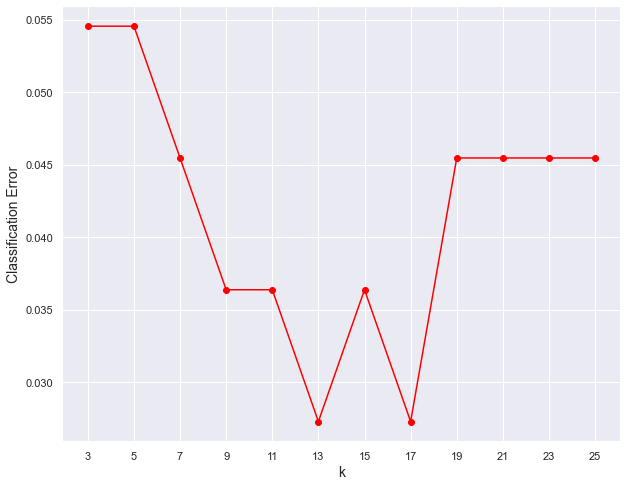

In [27]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

Now using the built-in sklearn.neighbors, will import KNeighborsClassifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Set Theme
sns.set_theme()

# Load iris data 
penguins1 = sns.load_dataset("penguins")
#I am dropping all the rows that contain NaN values in this Penguins dataset.
penguins1 = penguins1.dropna()
penguins1

# Grab Adelie and Chinstrap species
penguins1 = penguins1[penguins1["species"] != "Gentoo"]

# Create feature matrix
X = penguins1[["bill_length_mm","bill_depth_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Chinstrap":
        return 0
    else:
        return 1
    
        
# Create target value array
y = penguins1["species"].map(make_labels).to_numpy()

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 13)

# Instantiate a KNN classifier 
clf = KNeighborsClassifier(n_neighbors = 7)

In [32]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

# Predicting

Using clf.predict(), here teh KNN algorithm predicting X_test

In [33]:
print(f"clf.predict(X_test) = {clf.predict(X_test)} \n")
y_pred = clf.predict(X_test)

print(f"y_pred == y_test = {y_pred == y_test} \n")

print(f"sum(y_pred == y_test)/len(y_test) = {sum(y_pred == y_test)/len(y_test)}")

clf.predict(X_test) = [1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1
 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1] 

y_pred == y_test = [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True] 

sum(y_pred == y_test)/len(y_test) = 1.0


# Accuracy Score

In [34]:
# Calculate the accuracy
clf.score(X_test, y_test)

1.0

The score is 1 (100%), which is very impressive.

# Plotting

Here, its time to plot decision regions

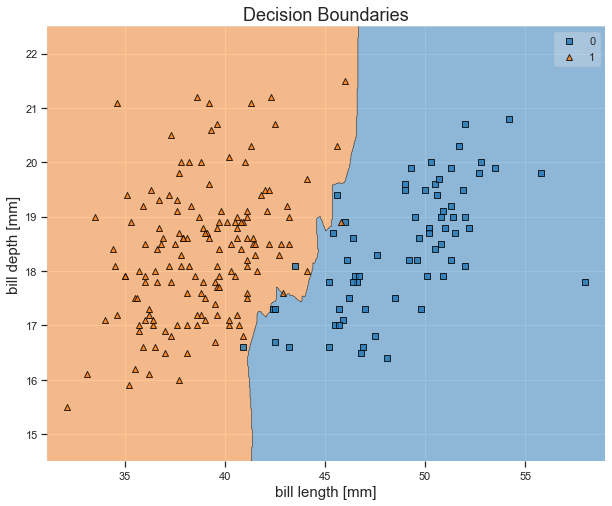

In [35]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()

The results are amazing as it separates the two species.

# Confusion Matrix

Using n_neighbors= 7, here I am checking the confusion matrix

cf_matrix = [[23  0]
 [ 0 48]] 



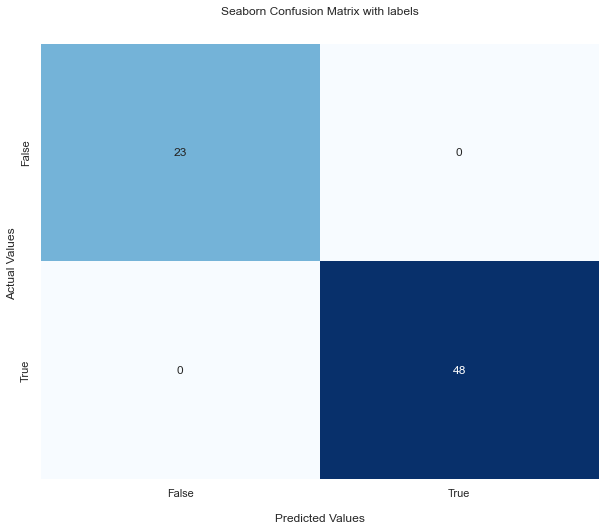

In [36]:
from sklearn.metrics import confusion_matrix

# Define the model
clf = KNeighborsClassifier(n_neighbors = 7)

# Fit the model
clf.fit(X_train,y_train)

# Make predictions on testing data
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

The KNN Algorithm works great on this penguins data set and it predicts all the true labels.

# Classification Report

In [37]:
from sklearn.metrics import classification_report

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        48

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71



The accuracy is 1(100%). The KNN Algorithm works great and predicts very well.